<a href="https://colab.research.google.com/github/triductran00/FashionMNIST/blob/main/hehe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/hehe

/content/drive/MyDrive/hehe


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


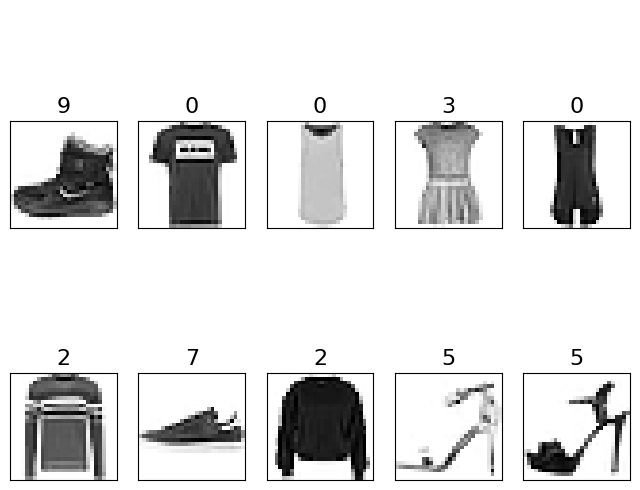

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, layers
from mnist import load_mnist


# 0:Load MNIST data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, one_hot_label=False)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

# validation_split = 0.1
# split_index = int(len(x_train) * (1 - validation_split))

# x_train, x_val = x_train[:split_index], x_train[split_index:]
# t_train, t_val = t_train[:split_index], t_train[split_index:]

n_data = 10
row = 2
col = 5
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(8, 6))

fig.suptitle("MNIST data-set", fontsize=24, color='white')
for i, img in enumerate(x_train[:n_data]):
    _r = i // col
    _c = i % col
    ax[_r,_c].set_title(t_train[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False)
    ax[_r,_c].axes.yaxis.set_visible(False)
    ax[_r,_c].imshow(img.reshape(28, 28), cmap='Greys')

plt.show()
plt.close()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               8

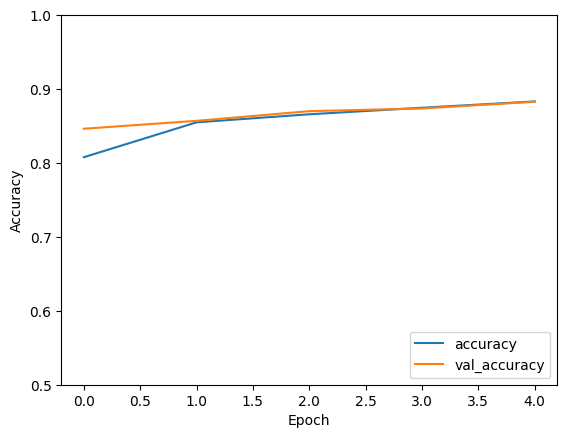

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax'),
# ])
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(x_train, t_train, epochs=5, validation_data=(x_test, t_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

1/1 [==============================] - 0s 38ms/step


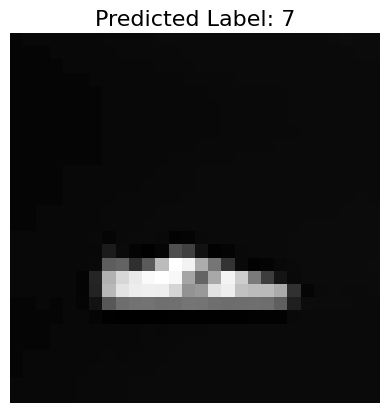

In [ ]:
from PIL import Image

def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Chuyển ảnh sang đen trắng (grayscale)
    image = image.resize((28, 28))  # Resize ảnh về kích thước (28, 28)
    image = np.array(image)  # Chuyển ảnh sang dạng mảng numpy
    image = image.reshape(1, 28, 28, 1)  # Reshape ảnh thành (1, 28, 28, 1) - Batch size = 1
    image = image.astype('float32')  # Chuyển đổi kiểu dữ liệu sang float32
    image /= 255  # Chuẩn hóa giá trị pixel từ 0-255 về khoảng 0-1
    return image

image_path = '/content/3444230800_6_1_1.jpg'
preprocessed_image = preprocess_image(image_path)

# Dự đoán số trong ảnh
prediction = model.predict(preprocessed_image)
predicted_label = np.argmax(prediction)  # Chọn nhãn có xác suất dự đoán cao nhất

# Hiển thị ảnh và nhãn dự đoán
plt.imshow(preprocessed_image.squeeze(), cmap='Greys')
plt.title(f'Predicted Label: {predicted_label}', fontsize=16, color='black')
plt.axis('off')
plt.show()